# Graduate admission using Machine Learning

The graduate admission can be really tough for most of the students. As a student that want to form part of a graduate school, i wonder myself, what are my chance to get into one of this schools?

In the webpage Kaggle, i found this incredible dataset that collect data from undergraduate students, such as the University Rating (the University place where study their undergraduate), their CGPA, their TOEFL Score and others. The most important thing that this dataset has is the *Chance of Admit* from every student based on their qualifications.


With all this data, it's possible to use Multiple Linear Regression (since we had several variables) to create a model to predict the chance od admission of new students that aren't in the dataset. So let get started!

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

### Read and visualizate the data

Using pandas, you can read the csv file and know things like how many rows and columns had.

In [14]:
data=pd.read_csv('Admission_Predict.csv')

students=pd.DataFrame(data)
students

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [15]:
from tabulate import tabulate

print(tabulate(students.head(), tablefmt="pipe", headers="keys"))

|    |   Serial No. |   GRE Score |   TOEFL Score |   University Rating |   SOP |   LOR  |   CGPA |   Research |   Chance of Admit |
|---:|-------------:|------------:|--------------:|--------------------:|------:|-------:|-------:|-----------:|------------------:|
|  0 |            1 |         337 |           118 |                   4 |   4.5 |    4.5 |   9.65 |          1 |              0.92 |
|  1 |            2 |         324 |           107 |                   4 |   4   |    4.5 |   8.87 |          1 |              0.76 |
|  2 |            3 |         316 |           104 |                   3 |   3   |    3.5 |   8    |          1 |              0.72 |
|  3 |            4 |         322 |           110 |                   3 |   3.5 |    2.5 |   8.67 |          1 |              0.8  |
|  4 |            5 |         314 |           103 |                   2 |   2   |    3   |   8.21 |          0 |              0.65 |


### Modify the data.

Right now, the *Serial No.* and the *GRE Score* sections are useless for our analysis, since the *Serial No.* just is for indexing and in our times, due to COVID-19, most universities doesn't require *GRE Score* for graduate admissions.

In [16]:
students=students.drop(['Serial No.','GRE Score'],axis=1)
students

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,4.5,9.65,1,0.92
1,107,4,4.0,4.5,8.87,1,0.76
2,104,3,3.0,3.5,8.00,1,0.72
3,110,3,3.5,2.5,8.67,1,0.80
4,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
395,110,3,3.5,3.5,9.04,1,0.82
396,107,3,3.0,3.5,9.11,1,0.84
397,116,4,5.0,4.5,9.45,1,0.91
398,103,3,3.5,4.0,8.78,0,0.67


In [17]:
print(tabulate(students.head(), tablefmt="pipe", headers="keys"))

|    |   TOEFL Score |   University Rating |   SOP |   LOR  |   CGPA |   Research |   Chance of Admit |
|---:|--------------:|--------------------:|------:|-------:|-------:|-----------:|------------------:|
|  0 |           118 |                   4 |   4.5 |    4.5 |   9.65 |          1 |              0.92 |
|  1 |           107 |                   4 |   4   |    4.5 |   8.87 |          1 |              0.76 |
|  2 |           104 |                   3 |   3   |    3.5 |   8    |          1 |              0.72 |
|  3 |           110 |                   3 |   3.5 |    2.5 |   8.67 |          1 |              0.8  |
|  4 |           103 |                   2 |   2   |    3   |   8.21 |          0 |              0.65 |


In [18]:
students_by_university=students.groupby(by='University Rating').mean()
students_by_university

,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,
1,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


In [19]:
print(tabulate(students_by_university, tablefmt="pipe", headers="keys"))

|   University Rating |   TOEFL Score |     SOP |    LOR  |    CGPA |   Research |   Chance of Admit |
|--------------------:|--------------:|--------:|--------:|--------:|-----------:|------------------:|
|                   1 |       99.0769 | 1.88462 | 2.21154 | 7.74577 |   0.192308 |          0.548077 |
|                   2 |      103.523  | 2.70561 | 2.92523 | 8.18374 |   0.299065 |          0.625981 |
|                   3 |      106.887  | 3.36466 | 3.40226 | 8.55226 |   0.533835 |          0.71188  |
|                   4 |      111.824  | 4.10811 | 4.00676 | 9.02162 |   0.797297 |          0.818108 |
|                   5 |      113.667  | 4.5     | 4.35833 | 9.29117 |   0.866667 |          0.888167 |


In the data, we can see that there is two sections, that is:

* **SOP**=*Statement of Purpose*
* **LOR**=*Letter of Recomendation Strength*

That two sections had a value that goes from 0 to 5. In this case, Research had only a value 0 (if the student isn't do research) or 1 (if the student do some research during his undergraduate).

The university rating is 1 to 5, depending on the reputation of the university where you came from.

Let's have a look of the data with pairplot from seaborn. That gonna give us a pairs plot. 

### Explorstory Analysis

But what are a pairs plot? Well, it's a couple of plots from one section to another. This gives me the oportunity to check if exist some relationship between two variables.

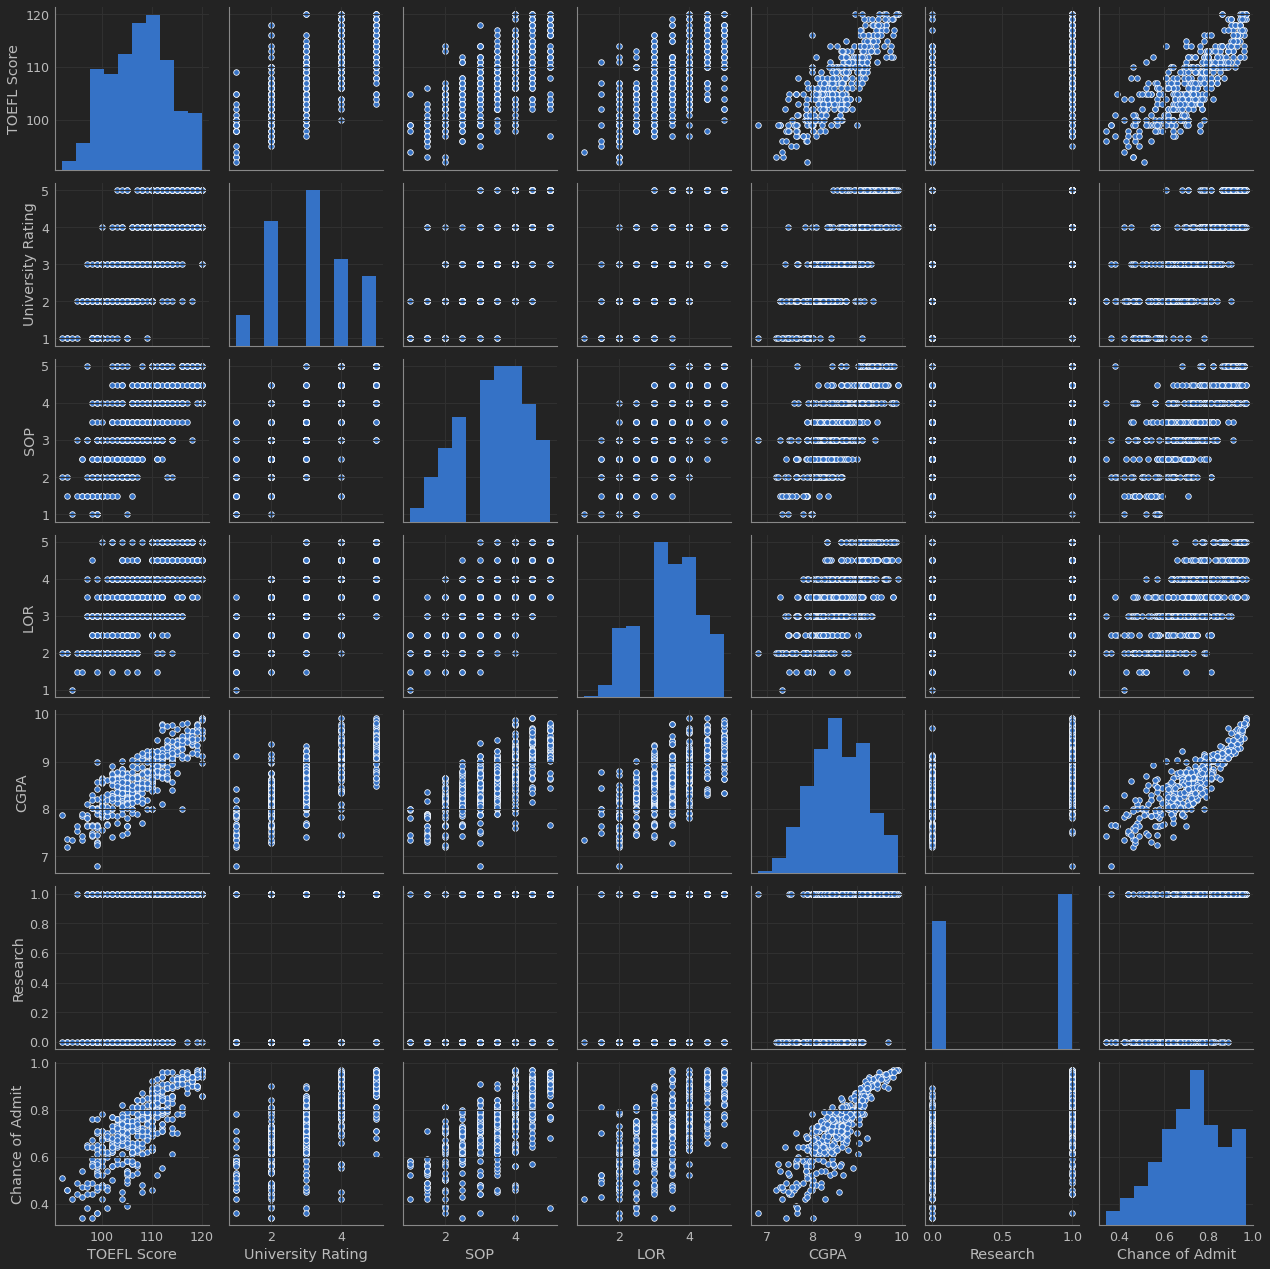

In [20]:
sns.pairplot(students)

We can see that the histograms are the distribution from a single variable (to see how it works). Also, you can check that, for example, in Chance of Admit and TOEFL Score had a relationship, while anothers isn't had to much relationship.

It's a fantastic idea check the correlation of the variables to see what can affect more our student profile.

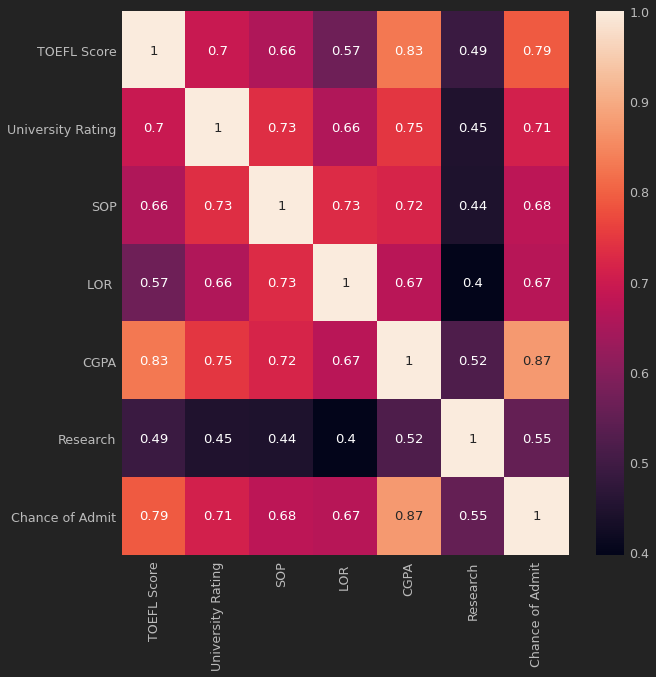

In [21]:
fig, axs=plt.subplots(figsize=(10,10))
sns.heatmap(students.corr(),annot=True)
plt.savefig('heatmap.png')

From this heatmap, it's easy to see that the principal features that affect the Chance of Admit are:

* University Rating (0.71)
* TOELF Score (0.79)
* CGPA(0.87)

So, we can study the correlation between CGPA and the chance of Admit. 

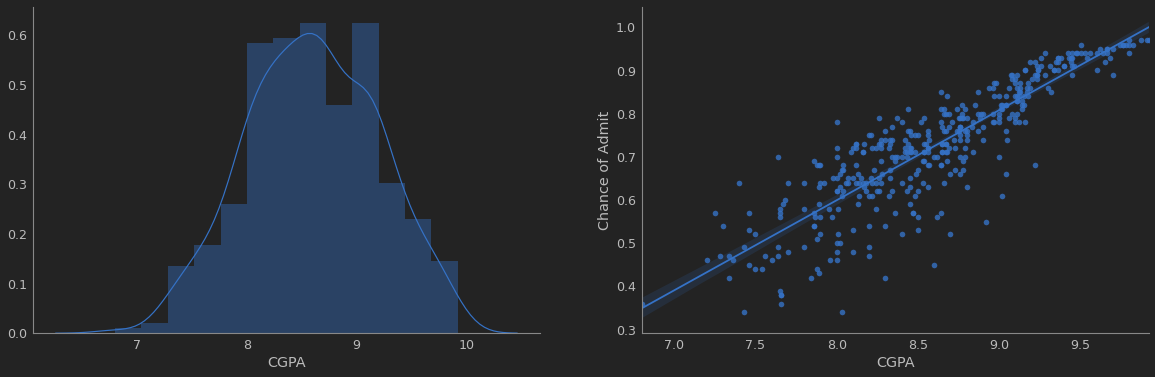

In [32]:
def analysis(section):
    global students
    fig,axs=plt.subplots(1,2,figsize=(20,6))
    #First plot, check a histogram
    sns.distplot(students[section],ax=axs[0])
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[0].grid(False)
    #Now, check the correlation of the variables
    sns.regplot(students[section],students['Chance of Admit'],ax=axs[1])
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].grid(False)
    plt.show()

analysis('CGPA')

It's really easy to note that CGPA had a really strong correlation with the chance of admission of the students.

What about the TOEFL score?

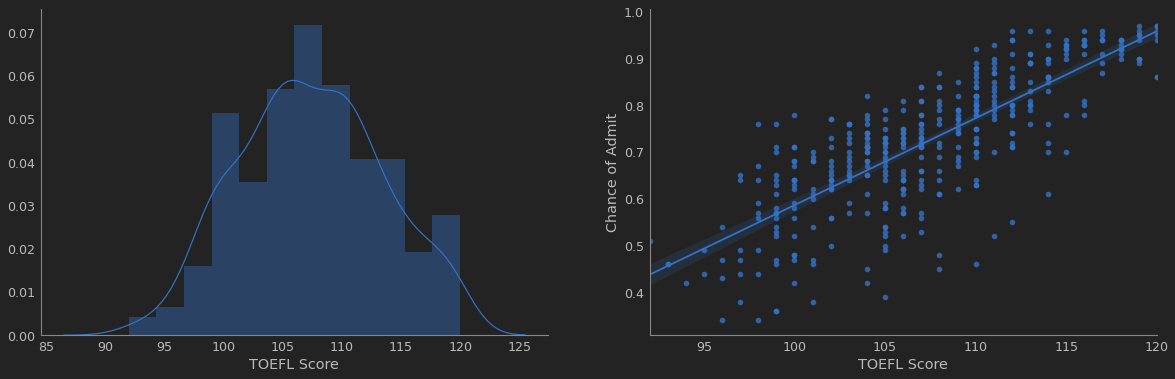

In [31]:
analysis('TOEFL Score')

Also had a strong correlation, but it less than the CGPA. 

And now, the last variable, the University Rating.

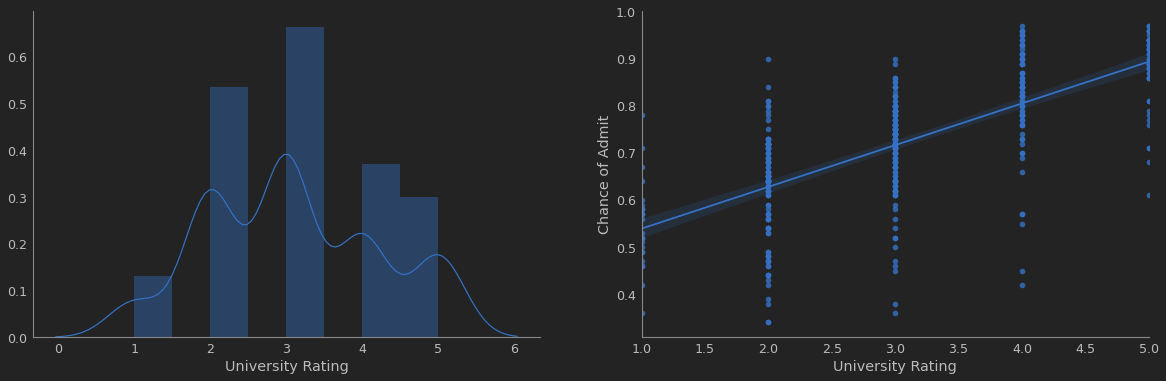

In [29]:
analysis('University Rating')

This doesn't show too much correlation, we can see it in the plot from the right. 

But with the plot from the left, we can look that the mayority of the universities in this data had a rating of 3. 

Okey, so now it's time to start the work.

### Preparing Data from Machine Learning

Now that we understand the data, we can implement some machine learning methods to give a prediccion of future applicant's chance of admission.

In [25]:
chances=students['Chance of Admit']
sections=students.drop('Chance of Admit',axis=1)

X_train, X_test, Y_train, Y_test=train_test_split(sections, chances, test_size=0.2, random_state=42)

You can see that I divide my DataFrame in two, one that only includes the Chance of Admit column and other that had all the others columns. 

Like i'm gonna use Linear Regression for this problem, I had the following equation:

\begin{equation}
y=b_0+b_1x_1+b_2x_2+b_3x_3+\cdots
\end{equation}

where $x_1,x_2,\cdots,x_n$ are the variables. In this case, all the columns (TOELF Score, CGPA and others). All that variables can affect to the result, our target $y$, that is the column *Chance of Admit*.

I can reescribe my equation to:

\begin{equation}
y=b_0+\sum_{i=1}^nb_nx_n
\end{equation}

So, $y=chances$ and $x_n$ are the sections. But i'm not gonna use all my dataset, i'm gonna split my data to get four variables. This variables are $x_{\text{train}},x_{\text{test}},y_{\text{train}},y_{\text{test}}$. In the command, I use $80\%$ of my data to train my model and i'm gonna test it with the restant $20\%$ to see of accurate it's the model.

Now it's time to work with Multiple Linear Regression.

### Machine Learning
Now we'll implement the algorithms that let us predict the chance of admission from future students. 

In [37]:
reg= LinearRegression()
reg.fit(X_train,Y_train)
Y_predict=reg.predict(X_test)
reg_score=(reg.score(X_test,Y_test))*100
print('The model has an accuracy of {0:.2f}%'.format(reg_score))

The model has an accuracy of 81.92%


That is a good accuracy! Now, you can play with this model and also you can predict your own chance of admition. It's really cool!

In [33]:
#Test values
test_student=np.array([90,3,4.5,4.5,8.75,1])
test_student=test_student.reshape(1,-1)


predict=(reg.predict(test_student)[0]*100)
print('Your chance of admit is {0:.2f}%'.format(predict))

Your chance of admit is 70.31%
